In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge
import catboost as cb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from dataset import MultiTSDataset

In [35]:
DS_PATH = "/Users/wesleypereira/Documents/tcc/exploration/gee_exploration/data/processed/dataset5"

In [36]:
ds = MultiTSDataset(DS_PATH)

In [37]:
x_data = []
target_data = []
for x, y in ds:
    x_data.append(x.flatten().tolist())
    target_data.append(y.flatten().tolist())

In [38]:
features = np.array(x_data)
target = np.array(target_data).flatten()

In [21]:
features.shape, target.shape

((20368, 630), (20368,))

In [22]:
pca = PCA(n_components=200)
pca.fit(features.T)

PCA(n_components=200)

In [23]:
pca.components_.shape

(200, 20368)

In [24]:
pca.explained_variance_ratio_.sum()

0.8075501338332228

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [40]:
X_train.shape, X_test.shape

((15276, 630), (5092, 630))

## CatBoost

In [41]:
train_dataset = cb.Pool(X_train, Y_train) 
test_dataset = cb.Pool(X_test, Y_test)

In [42]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [43]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 2046.1336435	test: 1900.6120828	best: 1900.6120828 (0)	total: 64ms	remaining: 6.34s
1:	learn: 2015.3674999	test: 1867.7878867	best: 1867.7878867 (1)	total: 69ms	remaining: 3.38s
2:	learn: 1986.2486753	test: 1836.8919627	best: 1836.8919627 (2)	total: 73.5ms	remaining: 2.38s
3:	learn: 1957.9719805	test: 1806.7773486	best: 1806.7773486 (3)	total: 77.7ms	remaining: 1.86s
4:	learn: 1931.1207533	test: 1778.2948245	best: 1778.2948245 (4)	total: 82.1ms	remaining: 1.56s
5:	learn: 1905.3968914	test: 1750.6869923	best: 1750.6869923 (5)	total: 86.2ms	remaining: 1.35s
6:	learn: 1881.0209190	test: 1724.6967268	best: 1724.6967268 (6)	total: 90.5ms	remaining: 1.2s
7:	learn: 1857.9525041	test: 1700.0054717	best: 1700.0054717 (7)	total: 95.4ms	remaining: 1.1s
8:	learn: 1835.6172616	test: 1675.8484726	best: 1675.8484726 (8)	total: 99.9ms	remaining: 1.01s
9:	learn: 1813.9938813	test: 1652.5448871	best: 1652.5448871 (9)	total: 104ms	remaining: 939ms
10:	learn: 1793.5927121	test: 1630.3268560	best

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, pred)))
r2 = r2_score(Y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1346.11
R2: 0.18


In [29]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42, n_jobs=8)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, n_jobs=8, random_state=42)

In [30]:
Y_pred = rf.predict(X_test)

In [31]:
Y_predt = rf.predict(X_train)

In [32]:
r2_score(Y_train, Y_predt)

0.8958550534407363

In [33]:
r2_score(Y_test, Y_pred)

0.3034525112016151

In [15]:
import matplotlib.pyplot as plt
import numpy as np

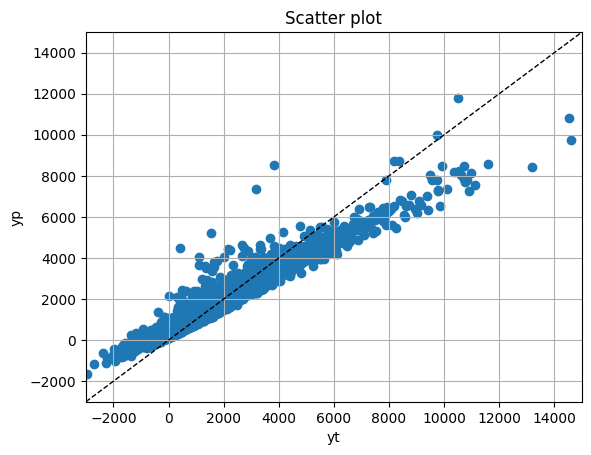

In [16]:

plt.scatter(Y_train, Y_predt)
plt.axis([-0.3e4, 1.5e4, -0.3e4, 1.5e4])
plt.plot([-0.3e4, 1.5e4], [-0.3e4, 1.5e4], color = 'black', linewidth = 1, linestyle='--')
plt.xlabel('yt')
plt.ylabel('yp')
plt.title('Scatter plot')
plt.grid(True)
plt.show()

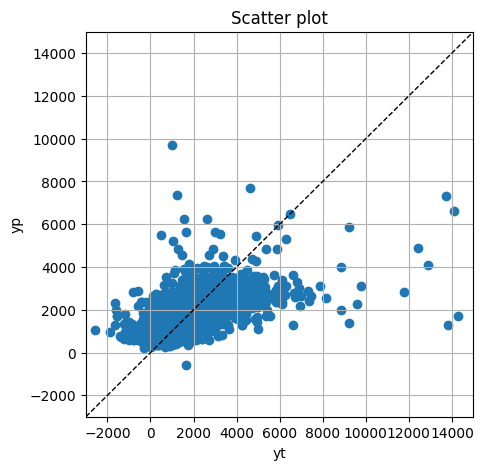

In [17]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(Y_test, Y_pred)
plt.axis([-0.3e4, 1.5e4, -0.3e4, 1.5e4])
plt.plot([-0.3e4, 1.5e4], [-0.3e4, 1.5e4], color = 'black', linewidth = 1, linestyle='--')
plt.xlabel('yt')
plt.ylabel('yp')
plt.title('Scatter plot')
plt.grid(True)
plt.show()